In [74]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import itertools
import matplotlib.pyplot as plt

# Zoo data set

In [2]:
#### zoo data set doesn't have the same size as the paper says
path = "C:/Users/Bruna/OneDrive/Documentos/PhD-Kessel/application/datasets_paper/incident_geometry_dataset/"
file = "zoo.data"
zoo = pd.read_csv(path+file, sep=',')
zoo

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# zoo data set preprocessing

In [3]:
# except the first column, all columns are int64 and there is no missing data
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aardvark  100 non-null    object
 1   1         100 non-null    int64 
 2   0         100 non-null    int64 
 3   0.1       100 non-null    int64 
 4   1.1       100 non-null    int64 
 5   0.2       100 non-null    int64 
 6   0.3       100 non-null    int64 
 7   1.2       100 non-null    int64 
 8   1.3       100 non-null    int64 
 9   1.4       100 non-null    int64 
 10  1.5       100 non-null    int64 
 11  0.4       100 non-null    int64 
 12  0.5       100 non-null    int64 
 13  4         100 non-null    int64 
 14  0.6       100 non-null    int64 
 15  0.7       100 non-null    int64 
 16  1.6       100 non-null    int64 
 17  1.7       100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [4]:
# Lets see if any value from the first column repeats, if they don't instead of the strings it is better to use their index
zoo.drop_duplicates()
zoo['aardvark'].value_counts()
# there are 2 "frog" lines

frog        2
gnat        1
bear        1
porpoise    1
duck        1
           ..
bass        1
hamster     1
mink        1
raccoon     1
seawasp     1
Name: aardvark, Length: 99, dtype: int64

In [5]:
# while checking the repeated lines with "frog" I've decided to keep the one with the column 0.4 = 1 instead of 0.4 = 0
zoo[zoo['aardvark']=='frog']

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
24,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
25,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [6]:
zoo=zoo.drop(24)

In [7]:
# let us check again if everything is alright, with unique values for the column 'aardvark'
zoo['aardvark'].value_counts()

gnat        1
honeybee    1
porpoise    1
duck        1
pheasant    1
           ..
bass        1
hamster     1
mink        1
raccoon     1
seawasp     1
Name: aardvark, Length: 99, dtype: int64

In [8]:
zoo = zoo.set_index(['aardvark'])
zoo

,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
aardvark,,,,,,,,,,,,,,,,,
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
# checking if everything is int64
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, antelope to wren
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       99 non-null     int64
 1   0       99 non-null     int64
 2   0.1     99 non-null     int64
 3   1.1     99 non-null     int64
 4   0.2     99 non-null     int64
 5   0.3     99 non-null     int64
 6   1.2     99 non-null     int64
 7   1.3     99 non-null     int64
 8   1.4     99 non-null     int64
 9   1.5     99 non-null     int64
 10  0.4     99 non-null     int64
 11  0.5     99 non-null     int64
 12  4       99 non-null     int64
 13  0.6     99 non-null     int64
 14  0.7     99 non-null     int64
 15  1.6     99 non-null     int64
 16  1.7     99 non-null     int64
dtypes: int64(17)
memory usage: 13.9+ KB


# Distance as feature of zoo data set

 Let us use "zoo" as our target data set.
 The first step is to get the geometric data set related to zoo, D(X)= (X, F, u) where F is the set of features as euclidean distances 
 between elements of X, and u the normalizing counting measure.

In [91]:
# Let us get the distance between the points of zoo
distances = pdist(zoo.values, metric='euclidean')

Next step: Compute the normalizing counting measure. Recall that the normalizing counting measure of B over X is given by u_X(B) = |X|^{-1}|B| where B \subset X

In [11]:
#I would like to know the cardinality of the inverse image of B for the Euclidean metric with B been any subset of zoo. 
#To compute that, let us find zoo's size because B belongs to  P(X) that means B's cardinality is in between 2^0 and 2^(zoo size) 
card_zoo = zoo['0'].size
card_zoo

99

In [12]:
#Let us build B's cardinalities' possible values
card_B = [ 2**i for i in range(0,card_zoo)]

# ObsDiam of zoo's geometric data set given alpha

We need to get Diam(B). Note that no matter what B's cardinality is, max{d(x,y):x,y \in zoo} will always be an element of B for some B \subset P(zoo), due to the fact we don't have an order in the data set. That means we can assume diam(B) = max{d(x,y):x,y \in zoo}. Due to the fact the ObsDiam is a sup of the inf of the diameter values of B, we can assume that the ObsDiam that we are looking for is diamB. 
So the question is: what is the value of max{d(x,y):x,y \in zoo}?

In [13]:
# Compute max{d(x,y):x,y \in zoo}
diamB = distances.max()
diamB

10.44030650891055

Conclusion: for this kind of data set with discrete values, the ObsDiam is trivial and it is the max value of distances between the data set elements.

# What if the data set can assume values in \mathbb{R}?

# Amazon stock price data set

In [14]:
path = "C:/Users/Bruna/OneDrive/Documentos/PhD-Kessel/application/datasets_suggestions/"
file = "Amazon.csv"
amazon = pd.read_csv(path+file, sep=',')
amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


# amazon's stock price data preprocessing

In [15]:
amazon.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [16]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [17]:
# transform Date from object to date
amazon_date=pd.to_datetime(amazon['Date'])
amazon["Date"] = amazon_date
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6155 non-null   datetime64[ns]
 1   Open       6155 non-null   float64       
 2   High       6155 non-null   float64       
 3   Low        6155 non-null   float64       
 4   Close      6155 non-null   float64       
 5   Adj Close  6155 non-null   float64       
 6   Volume     6155 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 336.7 KB


In [18]:
# set date as index
amazon = amazon.set_index(['Date'])

# Distance as feature for amazon's data set

For computational purposes I'll assume the set is ordered by date and B is not separable.

We need to find the geometric data set related to amazon's data set. Let us consider the features as euclidean distances on the data set.

What is the data set's cardinality? Due to the data set's nature of being able to assume any real number, the biggest cardinality it can have is the real numbers' cardinality (2^(aleph_0)). For explicitly computing let us set alpha and find some sets that satisfy |amazon|^{-1}|f^{-1}(B)|>=1-alpha

 1/length*card_inv_image_B >= 1-alpha, where card_inv_image_B is the unkown cardinality of B's inverse image we are looking for.

# alpha = 0

Assume alpha = 0 to compute DiamObs. In this case card_inv_image_B = |amazon|

In [19]:
amazon_card = amazon['Open'].size
amazon_card

6155

In this case DiamObs = max{d(x,y):x,y \in amazon}

In [20]:
dist_amazon = pdist(amazon.values, metric='euclidean')
dist_amazon_max = dist_amazon.max()
dist_amazon_max

103842000.00006227

In [21]:
alpha_DiamObs = [dist_amazon_max]
alpha_DiamObs

[103842000.00006227]

# alpha = 0.01

In [22]:
card_inv_image_B = 0.01*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

62

We need to find all the subsets od amazon with 3078 elements and compute the max diam of them.

In [23]:
amazon_index = range(0,amazon_card)
amazon['index'] = amazon_index
amazon = amazon.set_index(['index'])

In [24]:
length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

In [25]:
distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

71584800.0

In [26]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227, 71584800.0]

# alpha = 0.02

In [27]:
card_inv_image_B = 0.02*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

123

In [28]:
length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

In [29]:
distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

71584800.0

In [30]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227, 71584800.0, 71584800.0]

# alpha = 0.03

In [31]:
card_inv_image_B = 0.03*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

71668800.00000021

In [32]:
card_inv_image_B

185

In [33]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227, 71584800.0, 71584800.0, 71668800.00000021]

# alpha = 0.04

In [34]:
card_inv_image_B = 0.04*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [35]:
card_inv_image_B

246

In [36]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384]

# alpha = 0.05

In [37]:
card_inv_image_B = 0.05*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [38]:
card_inv_image_B

308

In [39]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.06

In [40]:
card_inv_image_B = 0.06*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [41]:
card_inv_image_B

369

In [42]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.07

In [43]:
card_inv_image_B = 0.07*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [44]:
card_inv_image_B

431

In [45]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.08

In [46]:
card_inv_image_B = 0.08*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [47]:
card_inv_image_B

492

In [48]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.09

In [49]:
card_inv_image_B = 0.09*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [50]:
card_inv_image_B

554

In [51]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.1

In [52]:
card_inv_image_B = 0.1*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [53]:
card_inv_image_B

616

In [54]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.11

In [55]:
card_inv_image_B = 0.11*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [56]:
card_inv_image_B

677

In [57]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.12

In [58]:
card_inv_image_B = 0.12*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [59]:
card_inv_image_B

739

In [60]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.13

In [61]:
card_inv_image_B = 0.13*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [62]:
card_inv_image_B

800

In [63]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# alpha = 0.14

In [64]:
card_inv_image_B = 0.14*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [65]:
card_inv_image_B

862

In [66]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# Alpha = 0.15

In [67]:
card_inv_image_B = 0.15*amazon_card
card_inv_image_B = round(card_inv_image_B)
card_inv_image_B

length = range(0,card_inv_image_B)
Bs = []
for i in length:
    B=amazon.iloc[i:card_inv_image_B+i]
    Bs.append(B)

distance = []
for b in Bs:
    dist_B = pdist(b.values, metric='euclidean')
    distance.append(dist_B)
np.max(distance)

101310000.00004384

In [68]:
card_inv_image_B

923

In [69]:
alpha_DiamObs.append(np.max(distance))
alpha_DiamObs

[103842000.00006227,
 71584800.0,
 71584800.0,
 71668800.00000021,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384,
 101310000.00004384]

# Visualization alpha x DiamObs

In [70]:
alpha_DiamObs = pd.DataFrame(alpha_DiamObs)

In [71]:
alpha_range = range(0,16,1)
list_alpha=[]
for i in alpha_range:
    list_alpha.append(i*0.01)

In [72]:
alpha_DiamObs['alpha'] = list_alpha

In [86]:
alpha_DiamObs.columns=['DiamObs', 'alpha']

In [80]:
import seaborn as sns 
import matplotlib.pyplot as plt

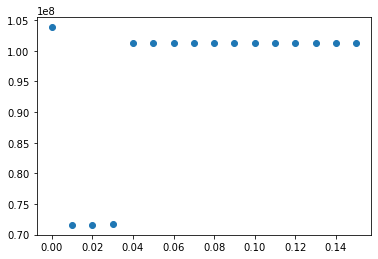

In [90]:
plt.scatter(alpha_DiamObs['alpha'], alpha_DiamObs['DiamObs'])